In [3]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#%pip install graphviz
from graphviz import Source
from sklearn.metrics import accuracy_score
import os
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score


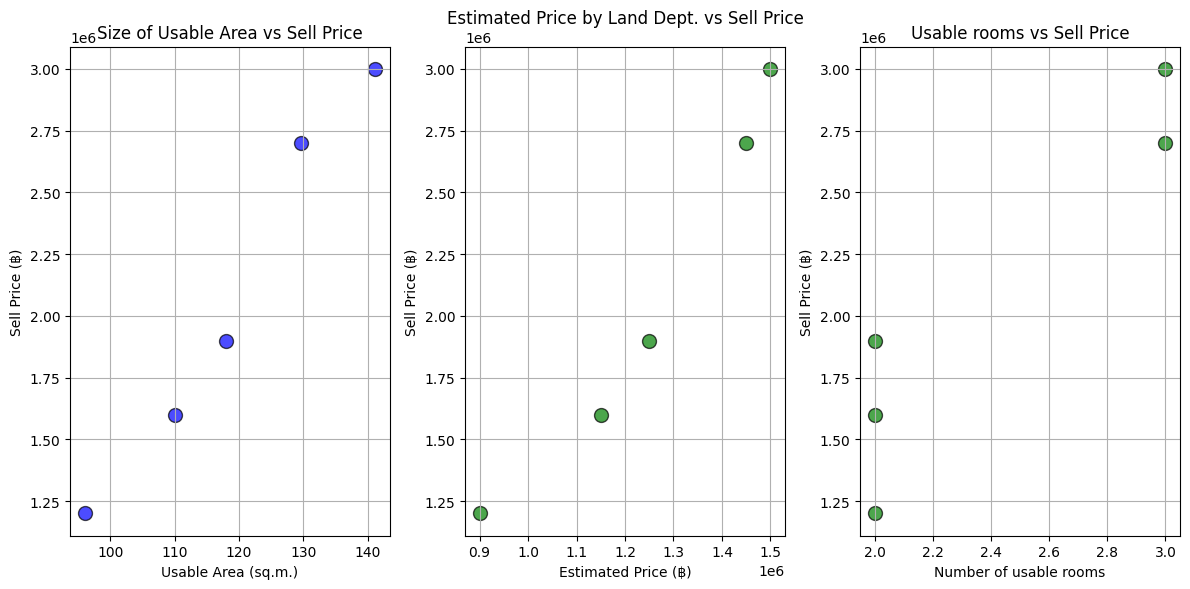

In [4]:
# @title Sizes-Est'd_price-Num_usable_rooms-Sell_price
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Data + user request
sizes = [96.0, 118.0, 141.2, 129.6, 110.0] # Size of usable area in sq.m.
est_prices = [900000, 1250000, 1500000, 1450000, 1150000] # Room estimated prices by department of lands in Baht
rooms = [2, 2, 3, 3, 2] # Number of rooms
sell_prices = [1200000, 1900000, 3000000, 2700000, 1600000] # Room appraisal prices in Baht
# Create figure and axes for Size-Price plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
# Plot Size vs Price
ax1.scatter(sizes, sell_prices, color='b', s=100, edgecolors='black', alpha=0.7)
ax1.set_xlabel('Usable Area (sq.m.)')
ax1.set_ylabel('Sell Price (฿)')
ax1.set_title('Size of Usable Area vs Sell Price')
ax1.grid(True)
# Plot Est'd price vs Price
ax2.scatter(est_prices, sell_prices, color='g', s=100, edgecolors='black', alpha=0.7)
ax2.set_xlabel('Estimated Price (฿)')
ax2.set_ylabel('Sell Price (฿)')
ax2.set_title('Estimated Price by Land Dept. vs Sell Price')
ax2.grid(True)
# Plot Rooms vs Price
ax3.scatter(rooms, sell_prices, color='g', s=100, edgecolors='black', alpha=0.7)
ax3.set_xlabel('Number of usable rooms')
ax3.set_ylabel('Sell Price (฿)')
ax3.set_title('Usable rooms vs Sell Price')
ax3.grid(True)
plt.tight_layout()
plt.show()

## 1.1

In [5]:
data = {
 'Size': sizes,
 'Est_Price': est_prices,
 'Rooms': rooms,
 'Sell_Price': sell_prices
}
df = pd.DataFrame(data)
# Display the DataFrame
print(df)
#################################
# Your code…
# Data transformation …
# Train-test-sampling …
# Model initialization …
# Model fitting and evaluation metrics …
# Prediction …

    Size  Est_Price  Rooms  Sell_Price
0   96.0     900000      2     1200000
1  118.0    1250000      2     1900000
2  141.2    1500000      3     3000000
3  129.6    1450000      3     2700000
4  110.0    1150000      2     1600000


In [ ]:
x_train = df[['Size', 'Est_Price']]
y_train = df[['Sell_Price']]
print(x_train)

    Size  Est_Price
0   96.0     900000
1  118.0    1250000
2  141.2    1500000
3  129.6    1450000
4  110.0    1150000


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

LinearRegression()

In [ ]:
y_p = poly_reg_model.predict(poly_features)
print(y_p)

[[1200000.]
 [1900000.]
 [3000000.]
 [2700000.]
 [1600000.]]


In [ ]:
metrics.r2_score(y_train, y_p)

1.0

# 1.2

In [ ]:
size=[125]
est_price=[1300000]
room=[3]
price=[2200000]

test_data = {
 'Size': size,
 'Est_Price': est_price,
 'Room': room,
 'Sell_Price': price
}

test_df = pd.DataFrame(test_data)
print(test_df)

   Size  Est_Price  Room  Sell_Price
0   125    1300000     3     2200000


In [ ]:
x_test = test_df[['Size', 'Est_Price']]
y_test = test_df[['Sell_Price']]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_test)

LinearRegression()

In [ ]:
y_p = poly_reg_model.predict(poly_features)
print(y_p[0][0])

2200000.0


# Part 2

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download mssmartypants/water-quality
! unzip water-quality.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/water-quality
License(s): copyright-authors
water-quality.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  water-quality.zip
replace waterQuality1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: waterQuality1.csv       


In [ ]:
df = pd.read_csv('waterQuality1.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
#check null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
#change to all number
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for feature in categorical_columns:
  df[feature] = label_encoder.fit_transform(df[feature])

df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,2476,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,2
1,2.32,1222,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,2
2,1.01,526,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,1
3,1.36,307,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,2
4,0.92,1511,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,2


In [ ]:
x = df.drop('is_safe', axis=1) # Define X before using it
x = x.replace('#NUM!', pd.NA)
df = pd.concat([x, df['is_safe']], axis=1).dropna() # Concatenate X and y and drop rows with any NaNs
x = df.drop('is_safe', axis=1)
y = df['is_safe']

y.head()

,is_safe
0,1
1,1
2,0
3,1
4,1


In [ ]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 2.1

In [ ]:
#อันนี้คืออันที่ได้ accuracy สูงสุด

tree = DecisionTreeClassifier(max_depth=18)
tree.fit(x_train, y_train)
y_train_pred = tree.predict(x_test)
accuracy_score(y_test, y_train_pred)

0.96375

0.96125


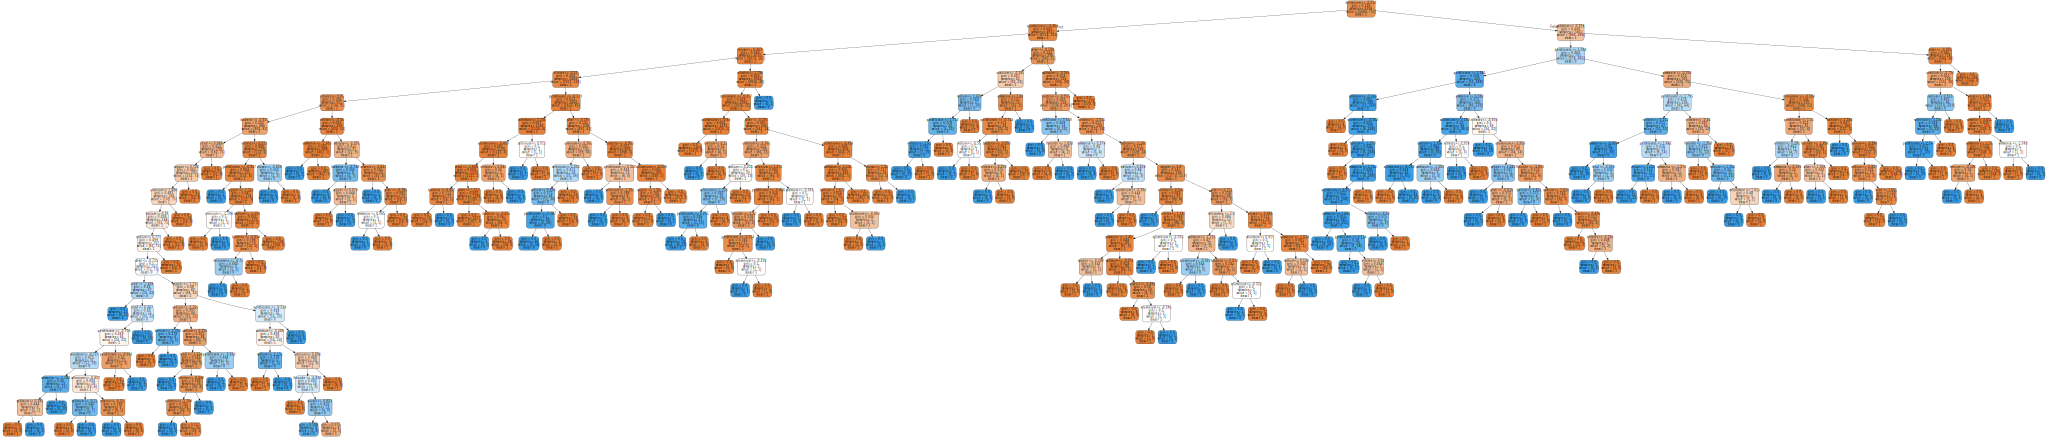

In [ ]:
tree = DecisionTreeClassifier(max_depth=18)
tree.fit(x_train, y_train)
y_train_pred = tree.predict(x_test)
print(accuracy_score(y_test, y_train_pred))

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "tree images")
os.makedirs(IMAGES_PATH, exist_ok=True)

export_graphviz(
    tree, # Our model learnt
    out_file = os.path.join(IMAGES_PATH, "DecisionTree.dot"),
    feature_names = x.columns,
    class_names = y.unique().astype(str),
    rounded = True,
    filled = True
)
Source.from_file(os.path.join(IMAGES_PATH, "DecisionTree.dot"))

# 2.2

In [ ]:
#predict

p = tree.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print(p)

['0']
